In [1]:
import pandas as pd

import spacy
nlp = spacy.load('en_core_web_sm')

from wordcloud import WordCloud

import matplotlib.pyplot as plt

#### Here, we are loading the packages to be used for this particular type of project.
 - We loaded the Pandas library to work upon data structures in Python
 - We loaded spacy library to work upon Natural Language Processing
 - Then we loaded the en_core_web_sm model to work upon English Text
 - Afterwards, we loaded the wordcloud package which is used for visualizing text 
 - At the end we loaded the matplotlib package which is basic visualization library to view plots in python

In [2]:
mails = pd.read_csv('spam.csv',encoding='ISO-8859-1',
                    header=None,skiprows = [0],names=['class','message','dump 1','dump 2','dump 3'])
del mails['dump 1']
del mails['dump 2']
del mails['dump 3']

FileNotFoundError: [Errno 2] File b'spam.csv' does not exist: b'spam.csv'

We start off by reading the csv file. As, the csv file is encoded in <b>utf-8</b> algorithm we use <b>encoding='ISO-8859-1'</b> so that pandas can read and make a dataframe out of the data.
<br>We specified to skip first row which is nothing but header and provided column names by ourself.</br>

Since dump 1 , dump2 and dump3 columns are of no use hence, we dropped them

In [3]:
mails.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


After the last step we are left with two columns which are <b>class</b> and <b>message</b>

In [4]:
mails.shape

(5572, 2)

On analyzing the shape of dataframe mails we can see that there are 5572 rows and 2 columns

In [5]:
mails = mails.sample(frac=0.10)

The dataset is too large for processing hence, we took a 10% sample of the original dataframe.

## Analyzing Text

In [6]:
mails.isnull().sum()

class      0
message    0
dtype: int64

There are no Null values in the dataframe

In [7]:
spam_mails = mails[mails['class'] == 'spam']
ham_mails = mails[mails['class'] == 'ham']

Here, we have seggegrated the data into respective classes such that <b>spam_mails</b> contains those rows or messages which are tagged as <b>Spam</b> and <b>ham_mails</b> contains those rows or messages which are tagged as <b>Ham</b> 

## Applying Natural Language Processing

In [8]:
def nlp_finder(text):
    doc = nlp(text)
    tokenized_text = ''
    for i in doc:
        if i.is_stop!=True and not i.is_punct and not i.like_num:
            tokenized_text = tokenized_text + i.lemma_ + ' '
    return tokenized_text.strip()

Now, we have separated our data on basis of classes. 
<br>But before visualizing them there is a strong urge to clean text. So, we used natural language processing</br>
<br>We declared a function called <b>nlp_finder()</b>which accepts string as input. It tokenizes the text and checks whether it is a stopword, punctuation mark or number. If it is not then its lemmatized version is being stored into string <b>tokenized_text</b></br>

In [9]:
spam_message = []
ham_message = []
for i in spam_mails['message'].values.tolist():
    spam_message.append(nlp_finder(i))
for i in ham_mails['message'].values.tolist():
    ham_message.append(nlp_finder(i))

For each ham and spam emails we passed each row from respective dataframe and stored them into <b>spam_message</b> and <b>ham_message</b> respectively.

## Spam Words Visualization

In [10]:
spam_wc = WordCloud(width = 512 , height = 512).generate(' '.join(spam_message))

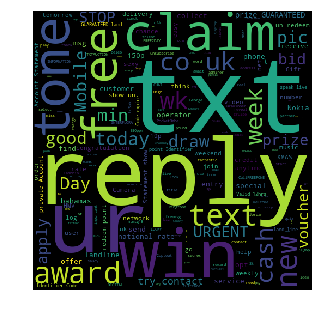

In [11]:
plt.figure(figsize = (5,10))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

After getting all text after text processing we used Wordcloud to visualize the text and specified width and height as 512 pixels to get better visualization.
Also, we plotted the graph using matplotlib library

## Ham Words Visualization

In [12]:
ham_wc = WordCloud(width = 512 , height = 512).generate(' '.join(ham_message))

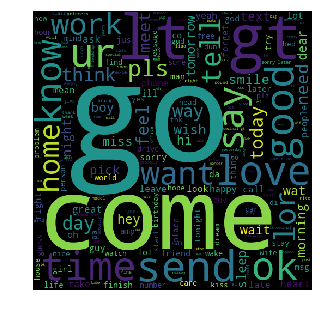

In [13]:
plt.figure(figsize = (5,10))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

We followed the same steps or Ham emails

## Observation

We observed that words like <b> free, text, send, reply</b> etc. are extensively used in Spam emails where normal words like <b>good, day</b> etc. are used in Ham emails

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

import pandas as pd

import re

In [4]:
import spacy
nlp = spacy.load('en_core_web_sm')

import pandas as pd

import re

#### Here, we are loading the packages to be used for this particular type of project.
 - We loaded spacy library to work upon Natural Language Processing
 - Then we loaded the en_core_web_sm model to work upon English Text
 - Afterwards, we loaded the Pandas library to work upon data structures in Python
 - At the end we loaded the regular expression library to find specific patterns in data

In [0]:
data = pd.read_excel('pos_ner.xlsx')

We loaded the dataset <b>pos_ner.xlsx</b> by using <b>pd.read_excel<b> since the dataset is in excel format

In [0]:
data.head()

,Startup News,Summary,Posted By,Description
0,"Startup Valuation: art, science or both?",A good approach to valuing a startup involves ...,Devang Mehta,Startups get valued at various stages of their...
1,"Innovation and education are about Aah, Aha, a...",This former international banker returned to I...,Madanmohan Rao,Ramji Raghavan is Founder-Chairman at Agastya ...
2,Art can make India stand tall and proud in the...,We dig deeper into the ArtSci Festival 2018 in...,Madanmohan Rao,PhotoSparks is a weekly feature from YourStory...
3,Meenakshi Group creates $10 million fund to in...,IT Park developer Meenakshi Group has created ...,Debolina Biswas,Hyderabad-headquartered IT Park developer Meen...
4,How to get funding at an idea level,NaN,Pradeep Goyal,This is an interesting one and works in realit...


Analyzing the top 5 rows of the dataframe data

In [0]:
data.isnull().sum()

Startup News    0
Summary         2
Posted By       0
Description     0
dtype: int64

On checking null values we can conclude that there are 2 values in the actual dataframe

In [0]:
data.fillna(' ',inplace=True)

Since, we are working upon text hence we filled the Null values by space which is being denoted by <b>' '<b>

In [0]:
data.head()

,Startup News,Summary,Posted By,Description
0,"Startup Valuation: art, science or both?",A good approach to valuing a startup involves ...,Devang Mehta,Startups get valued at various stages of their...
1,"Innovation and education are about Aah, Aha, a...",This former international banker returned to I...,Madanmohan Rao,Ramji Raghavan is Founder-Chairman at Agastya ...
2,Art can make India stand tall and proud in the...,We dig deeper into the ArtSci Festival 2018 in...,Madanmohan Rao,PhotoSparks is a weekly feature from YourStory...
3,Meenakshi Group creates $10 million fund to in...,IT Park developer Meenakshi Group has created ...,Debolina Biswas,Hyderabad-headquartered IT Park developer Meen...
4,How to get funding at an idea level,,Pradeep Goyal,This is an interesting one and works in realit...


Analyzing the data we find out that instead of <b>NaN</b> now space is being displayed

In [0]:
data['cumulative data'] = data['Startup News'] + data['Summary'] + data['Description']

Now, our aim is to find attributes of data such as Person Name, Location and Organization so we combined <b>Startup News, Summary</b> and <b>Description</b> column as anyone of them can contain potential detail

In [0]:
data.head()

,Startup News,Summary,Posted By,Description,cumulative data
0,"Startup Valuation: art, science or both?",A good approach to valuing a startup involves ...,Devang Mehta,Startups get valued at various stages of their...,"Startup Valuation: art, science or both?A good..."
1,"Innovation and education are about Aah, Aha, a...",This former international banker returned to I...,Madanmohan Rao,Ramji Raghavan is Founder-Chairman at Agastya ...,"Innovation and education are about Aah, Aha, a..."
2,Art can make India stand tall and proud in the...,We dig deeper into the ArtSci Festival 2018 in...,Madanmohan Rao,PhotoSparks is a weekly feature from YourStory...,Art can make India stand tall and proud in the...
3,Meenakshi Group creates $10 million fund to in...,IT Park developer Meenakshi Group has created ...,Debolina Biswas,Hyderabad-headquartered IT Park developer Meen...,Meenakshi Group creates $10 million fund to in...
4,How to get funding at an idea level,,Pradeep Goyal,This is an interesting one and works in realit...,How to get funding at an idea level This is an...


Analyzing the final dataset after combining dataset

## Applying Part of Speech to identify Person Name, Organization and Location

In [0]:
def pos_tagger(text):
    doc = nlp(text)
    pos = []
    for i in doc:
        if i.is_stop!=True and i.is_punct!=True and i.pos_=='PROPN':
            if i.lemma_ in pos:
                continue
            else:
                pos.append(i.lemma_)
    return pos

We defined a function called <b>pos_tagger</b> which accepts string as input.
<br>The input is being tokenized using nlp pipeline defined above and declared an empty list to store the end results</br>
<br>Then we iterated over each token of the tokenized input text. The result is being stored into the list if the token is not a stopword, pucntuation mark and has <b>Proper Noun</b> as part of speech.<br>
<br>The result is stored back in list only if list doesnot contain that word before. This helps in reducing repeatition</br>

In [0]:
pos_result = []
for i in data['cumulative data'].values.tolist():
    pos_result.append(pos_tagger(i))

In [0]:
data['Part of Speech'] = pos_result

Then, we iterated over each row of column <b>cumulative data</b> of dataframe data and passed each row to function.
The end result is being stored into list <b>pos_result</b>.
Since, function pos_tagger is returning data in form of list hence, pos_result would be a list of list

The final list is stored to <b>Part of Speech</b> column of dataframe

In [0]:
data.head()

,Startup News,Summary,Posted By,Description,cumulative data,Part of Speech
0,"Startup Valuation: art, science or both?",A good approach to valuing a startup involves ...,Devang Mehta,Startups get valued at various stages of their...,"Startup Valuation: art, science or both?A good...","[Startup, DCF, VCS, Discounted, Cash, Flow, Fi..."
1,"Innovation and education are about Aah, Aha, a...",This former international banker returned to I...,Madanmohan Rao,Ramji Raghavan is Founder-Chairman at Agastya ...,"Innovation and education are about Aah, Aha, a...","[Aah, Ha, Ramji, Raghavan, Agastya, Internatio..."
2,Art can make India stand tall and proud in the...,We dig deeper into the ArtSci Festival 2018 in...,Madanmohan Rao,PhotoSparks is a weekly feature from YourStory...,Art can make India stand tall and proud in the...,"[India, Sonu, Mulchandani, eStudioWe, ArtSci, ..."
3,Meenakshi Group creates $10 million fund to in...,IT Park developer Meenakshi Group has created ...,Debolina Biswas,Hyderabad-headquartered IT Park developer Meen...,Meenakshi Group creates $10 million fund to in...,"[Meenakshi, Group, startupsIT, Park, Multiples..."
4,How to get funding at an idea level,,Pradeep Goyal,This is an interesting one and works in realit...,How to get funding at an idea level This is an...,"[WhatsApp, Facebook, Indians, ’s, MVP, Social,..."


At the end we analyzed the data and saw that for each story we have some Proper Noun which could be either Name, Organization or Location

## Applying NER(Named Entity Recognition) for further digging into data

In [0]:
def ner_tagger(text):
    doc = nlp(text)
    name = []
    organization = []
    location = []
    for i in doc.ents:
        if i.label_=='PERSON':
            if i.lemma_ not in name:
                name.append(i.lemma_)                
        if i.label_=='ORG' and len(i.lemma_) > 2:
            if i.lemma_ not in organization:
                organization.append(i.lemma_)
        if i.label_=='GPE' and len(i.lemma_) > 2:
            if i.lemma_ not in location:
                location.append(i.lemma_)
    return name,organization,location

The limitation of Part of Speech tagger is that it finds only Proper Noun but it is unable to differentiate between Person Name, Organization and Location.
<br>Hence, we need another technique which helps us to do so.</br>
<br>The technique called <b>Named Entity Recognition</b> serves our purpose</br>
<br> We declared a function called <b>ner_tagger()</b> which accepts text as input and performs tokenization over the text.</br>

<br>Then, we iterated over each token as entities and find out that if token has label <b>PERSON</b> we append it to a list name declared above.
Also, if token has label <b>ORG</b>,<b>GPE</b> for organization and geographical location we append the data to organization list and location list respectively.</br>

In this manner the attributes of data such as person name, location and organization name can be easily find out

In [0]:
person = []
org = []
loc = []
for i in data['cumulative data'].values.tolist():
    a,b,c = ner_tagger(i)
    person.append(a)
    org.append(b)
    loc.append(c)

We iterated over cumulative data one by one and appended respective data to person, org and loc respectively.

In [0]:
data['Person Name'] = person
data['Organization'] = org
data['Geograpahical Location'] = loc

The final result from person, org and loc is being finally stored to pandas column Person Name, Organization and Geographical Location respectively

In [0]:
data.head()

,Startup News,Summary,Posted By,Description,cumulative data,Part of Speech,Person Name,Organization,Geograpahical Location
0,"Startup Valuation: art, science or both?",A good approach to valuing a startup involves ...,Devang Mehta,Startups get valued at various stages of their...,"Startup Valuation: art, science or both?A good...","[Startup, DCF, VCS, Discounted, Cash, Flow, Fi...","[Startup valuation, Comparables]","[VCS, Discounted Cash Flow -, WACC, Corporate ...",[]
1,"Innovation and education are about Aah, Aha, a...",This former international banker returned to I...,Madanmohan Rao,Ramji Raghavan is Founder-Chairman at Agastya ...,"Innovation and education are about Aah, Aha, a...","[Aah, Ha, Ramji, Raghavan, Agastya, Internatio...","[Aah, Ramji Raghavan, Agastya, Ha - ha !, P.K....","[Agastya International FoundationThis, Agastya...","[India, Bengaluru, Agastya, Kuppam]"
2,Art can make India stand tall and proud in the...,We dig deeper into the ArtSci Festival 2018 in...,Madanmohan Rao,PhotoSparks is a weekly feature from YourStory...,Art can make India stand tall and proud in the...,"[India, Sonu, Mulchandani, eStudioWe, ArtSci, ...","[Rupchand Kundu, Sonu Mulchandani, Sonu, Alber...","[PhotoSparks, YourStory, sonu, eStudio]","[India, Whitefield, Bengaluru]"
3,Meenakshi Group creates $10 million fund to in...,IT Park developer Meenakshi Group has created ...,Debolina Biswas,Hyderabad-headquartered IT Park developer Meen...,Meenakshi Group creates $10 million fund to in...,"[Meenakshi, Group, startupsIT, Park, Multiples...",[Mahesh Katragadda],"[Meenakshi Group, Park, iKeva, Group, proptech...",[Hyderabad]
4,How to get funding at an idea level,,Pradeep Goyal,This is an interesting one and works in realit...,How to get funding at an idea level This is an...,"[WhatsApp, Facebook, Indians, ’s, MVP, Social,...",[Facebook],"[WhatsApp, Social Media, seo]",[]


At the end we just previewed the final dataset

In [1]:
import pandas as pd

import spacy
nlp = spacy.load('en_core_web_sm')

import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import re

#### Here, we are loading the packages to be used for this particular type of project.
 - We loaded the Pandas library to work upon data structures in Python
 - We loaded spacy library to work upon Natural Language Processing
 - Then we loaded the en_core_web_sm model to work upon English Text
 - Thereafter we loaded the <b>gensim</b> package which contains high level text processing packages. We loaded the <b>LdaModel</b> which is stored under models in gensim and Dictionary for processing in gensim corpora
 - At the end we loaded the regular expression library to find specific patterns in data

In [2]:
data = pd.read_excel('topic_modelling.xlsx')

We then load the excel file <b>topic_modelling.xlsx</b> using pandas read_excel function

In [3]:
data.head()

,Startup News,Summary,Posted By,Description
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ..."
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand..."
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu..."


We analyzed the data and find that there are several NaN values in Summary column.

In [4]:
data.isnull().sum()

Startup News    0
Summary         6
Posted By       0
Description     0
dtype: int64

To see if any other column contains Null or NaN value we used <b>.isnull().sum()</b> functionality and it revealed that only Summary column contains 6 Null values.

In [5]:
data.fillna(' ',inplace=True)

Since, we are working upon text hence we filled the Null values by space which is being denoted by <b>' '<b>

In [6]:
data.head()

,Startup News,Summary,Posted By,Description
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ..."
1,Dream11 closes $100 M funding led by Tencent; ...,,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...
2,How enterprise gaming has grown from a ridicul...,,Kamalika Bhattacharya,Having spent a large part of my career in the ...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand..."
4,Facebook is celebrating two years of encouragi...,,Team YS,"Two years ago, Facebook India launched a uniqu..."


Analyzing the data we find out that instead of <b>NaN</b> now space is being displayed

In [7]:
data['cumulative data'] = data['Startup News'] + data['Summary'] + data['Description']

Now, our aim is to find attributes of data such as Person Name, Location and Organization so we combined <b>Startup News, Summary</b> and <b>Description</b> column as anyone of them can contain potential detail

In [8]:
data.head()

,Startup News,Summary,Posted By,Description,cumulative data
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ...",How PUBG has redefined the Indian gaming ecosy...
1,Dream11 closes $100 M funding led by Tencent; ...,,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...,Dream11 closes $100 M funding led by Tencent; ...
2,How enterprise gaming has grown from a ridicul...,,Kamalika Bhattacharya,Having spent a large part of my career in the ...,How enterprise gaming has grown from a ridicul...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand...",These MBA grads are changing the way India loo...
4,Facebook is celebrating two years of encouragi...,,Team YS,"Two years ago, Facebook India launched a uniqu...",Facebook is celebrating two years of encouragi...


Analyzing the final dataset after combining dataset

In [9]:
text = data['cumulative data'].values.tolist()
my_stop_words = [u'say',u'\s',u'Mr',u'Mrs',u'said',u'says',u'saying']

We extracted the <b>cumulative data</b> column from the data dataframe and converted it to list for faster accessibility.
<br>Then, we defined our custom stopwords inside a list</br>

In [10]:
for stopword in my_stop_words:
    nlp.vocab[stopword].is_stop = True

We iterated over <b>my_stop_words</b> list and using nlp pipeline vocab functionality we made the boolean result of operation <b>is_stop</b> of each stopword as True, i.e. each word in my_stop_words list is made a stopword in spacy corpus

## Applying Topic modelling using LDA algorithm

In [11]:
def topic_modeller(texting):
    doc = nlp(texting)
    article = []
    for w in doc:
        if w.is_stop!=True and not w.is_punct and not w.like_num:
            article.append(w.lemma_)
    bigram = gensim.models.Phrases(article)
    texts = [bigram[line] for line in article]
    article = [d.split() for d in article]
    dictionary = Dictionary(article)
    corpus = [dictionary.doc2bow(text) for text in article]
    ldamodel = LdaModel(corpus=corpus,id2word=dictionary,num_topics=8,random_state=42)
    ab = ldamodel.show_topics(num_topics=2)
    b = re.sub("[^a-zA-Z]{4,}"," ",str(ab))
    b = b.split()
    unique_list = []
    for x in b: 
        if x not in unique_list:
            unique_list.append(x)
    line = [i for i in unique_list if len(i) > 1]
    return line

Then, we defined a function called <b>topic_modeller</b> which accepts a string as input. We tokenized the input string so recieved.
<br>We iterated over each token of tokenized input string and checked whether it is a stop word, punctuation mark or a number.
If it is not then its lemmatized version is being stored into article list</br>
<br>Then, we made bigrams and converted whole tokens into bigram to check possibility of words occuring together such as New York, Big Data etc.</br>
<br>Afterwards, we prepared a dictionary and corpus to be used by LdaModel. We called the LdaModel and passed formed corpus and dictionary and decided 8 as number of topics</br>
<br>The final output contains 2 sets of 8-8 topics making in total 16 topics to justify a document completely.</br>
<br>Then, we applied regular expression to extract tags of length more than 4 and stored only unique topics.
Thereafter, we returned the list <b>line</b> which contains final topics for the input story</br>

In [12]:
result = []
for j in text:
    result.append(topic_modeller(j))
data['Tags'] = result
data['Tags'] = data['Tags'].str.join(', ')

export = data[['Startup News','Summary','Posted By','Description','cumulative data','Tags']]

We passed each story one by one to topic_modeller function and stored the result into <b>result</b> variable

We then store all Tags to column <b>Tags</b> in dataframe data where each story contains corresponding tags

In [13]:
export.head()

,Startup News,Summary,Posted By,Description,cumulative data,Tags
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ...",How PUBG has redefined the Indian gaming ecosy...,"player, work, download, India, day, long, mobi..."
1,Dream11 closes $100 M funding led by Tencent; ...,,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...,Dream11 closes $100 M funding led by Tencent; ...,"Dream, percent, gamer, million, round, Nazara,..."
2,How enterprise gaming has grown from a ridicul...,,Kamalika Bhattacharya,Having spent a large part of my career in the ...,How enterprise gaming has grown from a ridicul...,"mobile, opportunity, widespread, player, junk,..."
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand...",These MBA grads are changing the way India loo...,"MadOverPoker, face, Abhishek, dramatic, change..."
4,Facebook is celebrating two years of encouragi...,,Team YS,"Two years ago, Facebook India launched a uniqu...",Facebook is celebrating two years of encouragi...,"encourage, sheleadstech, entrepreneur, resourc..."


At last we finally analyzed the new dataframe export containing all column.